# Reliability Analysis in Python

A python version of <a href="https://systemhealthlab.com/research-tools/example-of-a-reliability-analysis-in-r/">Reliability Analysis in R </a>.

## Packages

To run this notebook, you will need the following python packages installed: <code>numpy</code>, <code>matplotlib</code>, <code>pandas</code>, <code>reliability</code>, and <code>statsmodels</code>. There is a weibull specific package, but it is being superceded by reliability, so we'll stick with that.

### Pandas

pandas is a library desgined to make working with structed and time series data easy and intuitive, and is available from <a href="https://pypi.org/project/pandas/">here</a>. 

### Reliability

reliability is a library for reliability engineering and survival analysis and it's key features include fitting probability distributions to right censored data and fitting Weibull models. It's available from <a href="https://pypi.org/project/reliability/">here</a>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import reliability as rb
from statsmodels.distributions.empirical_distribution import ECDF

# Analysis

## 1. Dataset

In [2]:
exa1 = pd.read_csv('https://raw.githubusercontent.com/CodeOwl94/ross-reliability/master/EXA1.csv', header=0)
exa1.head()

,fail,time
0,F,57
1,F,7
2,F,21
3,F,7
4,S,76


Our data appears to have been read in OK, we know this as the number of rows, 127, and number of columns, 2, match both the <a href="https://raw.githubusercontent.com/CodeOwl94/ross-reliability/master/EXA1.csv">original data set</a> and the <a href="https://systemhealthlab.com/research-tools/example-of-a-reliability-analysis-in-r/"> R script</a>. 

In [3]:
exa1['fail'].value_counts()

F    123
S      4
Name: fail, dtype: int64

We can also see that the data has been read OK with the number of F's and S's, where the values of the <code>fail</code> column are:

<ul>F, Failure: a valid time-to-failure measurement, or</ul>
 
<ul>S, Suspension: a right censored measurement</ul>

We'll first sort the data by <code>time</code>, in ascending order to make it easier to plot.

In [4]:
exa1 = exa1.sort_values(by='time',ignore_index=True, ascending=True)
exa1.head()

,fail,time
0,F,3
1,F,3
2,F,3
3,F,3
4,F,3


## 2. Graphical Analysis

Using <i>matplotlib</i> we can have an initial look at the data. Following the <a href='https://systemhealthlab.com/research-tools/example-of-a-reliability-analysis-in-r/'>R script</a> we'll plot subsets of the data to have a better look.

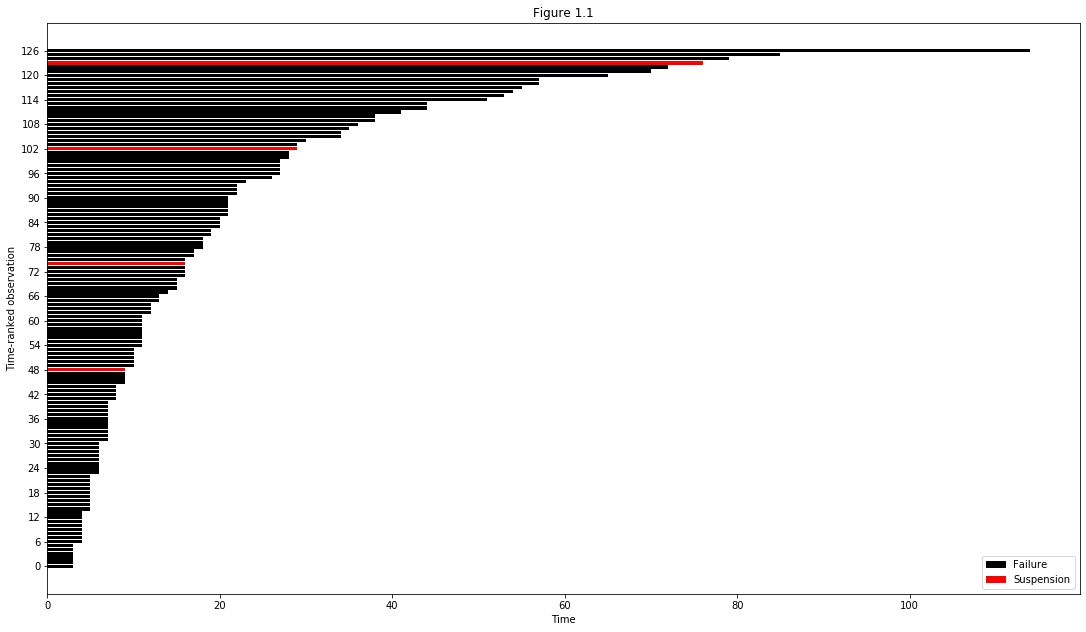

In [5]:
yaxis = np.arange(0, len(exa1), 6)

fig, ax = plt.subplots()

mask1 = exa1['fail']=='F'
mask2 = exa1['fail']=='S'

ax.barh(np.arange(0,len(exa1))[mask1], exa1['time'][mask1], color='black', label='Failure')
ax.barh(np.arange(0,len(exa1))[mask2], exa1['time'][mask2], color='red', label='Suspension')

ax.set_yticks(yaxis)
ax.set_yticklabels(yaxis)
ax.set_xlabel('Time')
ax.set_ylabel('Time-ranked observation')
ax.set_title('Figure 1.1')
ax.legend()
fig.set_size_inches(18.5, 10.5)

plt.show()

Plotting the observations ranked 1 to 60, in terms of time measurement we can see the first right-censored measurement occurs at rank 48, along with three other measurements.

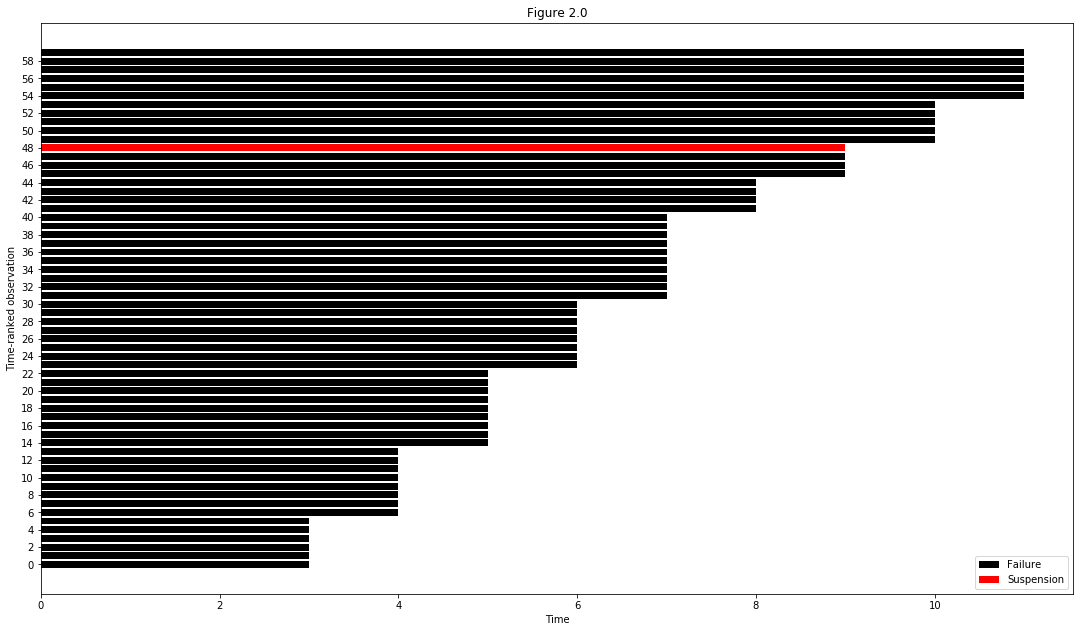

In [6]:
yaxis = np.arange(0, len(exa1[:60]), 2)

fig, ax = plt.subplots()

mask1 = exa1[:60]['fail']=='F'
mask2 = exa1[:60]['fail']=='S'

ax.barh(np.arange(0,len(exa1[:60]))[mask1], exa1[:60]['time'][mask1], color='black', label='Failure')
ax.barh(np.arange(0,len(exa1[:60]))[mask2], exa1[:60]['time'][mask2], color='red', label='Suspension')

ax.set_yticks(yaxis)
ax.set_yticklabels(yaxis)
ax.set_xlabel('Time')
ax.set_ylabel('Time-ranked observation')
ax.set_title('Figure 2.0')
ax.legend()
fig.set_size_inches(18.5, 10.5)

plt.show()

Looking at the remainder of observations, we see that the three other censored measurements occur at ranks 75,  102, and 123.


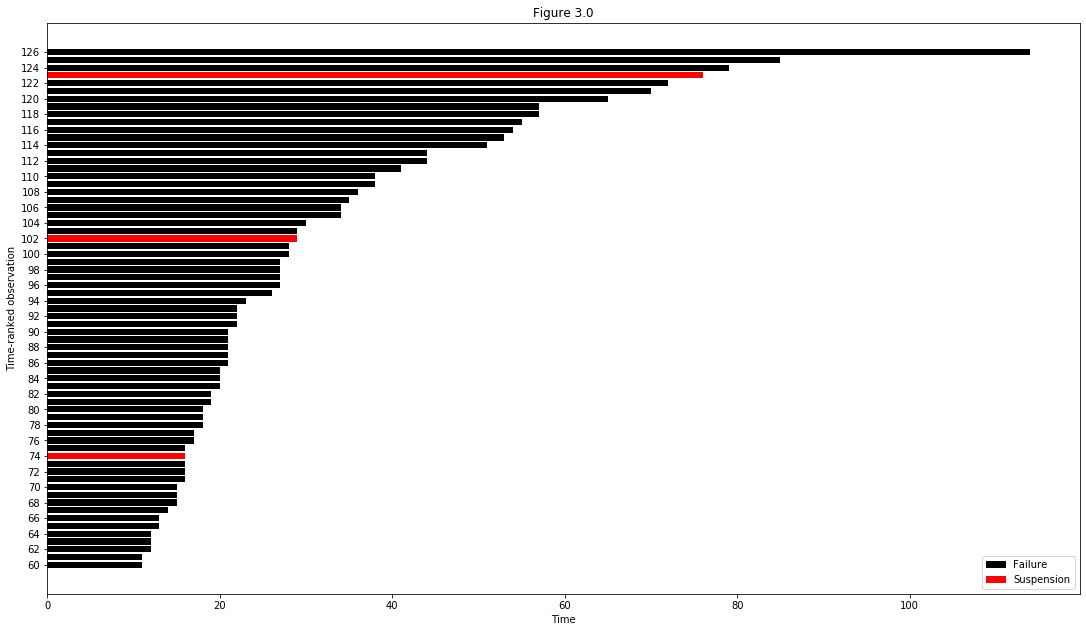

In [7]:
yaxis = np.arange(60 ,len(exa1), 2)

fig, ax = plt.subplots()

mask1 = exa1[60:]['fail']=='F'
mask2 = exa1[60:]['fail']=='S'

ax.barh(np.arange(60,len(exa1))[mask1], exa1[60:]['time'][mask1], color='black', label='Failure')
ax.barh(np.arange(60,len(exa1))[mask2], exa1[60:]['time'][mask2], color='red', label='Suspension')

ax.set_yticks(yaxis)
ax.set_yticklabels(yaxis)
ax.set_xlabel('Time')
ax.set_ylabel('Time-ranked observation')
ax.set_title('Figure 3.0')
ax.legend()
fig.set_size_inches(18.5, 10.5)

plt.show()

And to verify the ranks:

In [8]:
print(exa1[exa1['fail']=='S'])

    fail  time
48     S     9
74     S    16
102    S    29
123    S    76


Now, we'll have a look at the empirical cumulative frequency distribution of the complete time-to-failure measurements.

In [38]:
failures = exa1[exa1['fail']=='F']
right_censored = exa1[exa1['fail']=='S']

In [10]:
ecdf = ECDF(failures['time'])

qtl_25 = failures.quantile(q = 0.25)
qtl_5 = failures.quantile(q = 0.5)
qtl_75 = failures.quantile(q = 0.75)

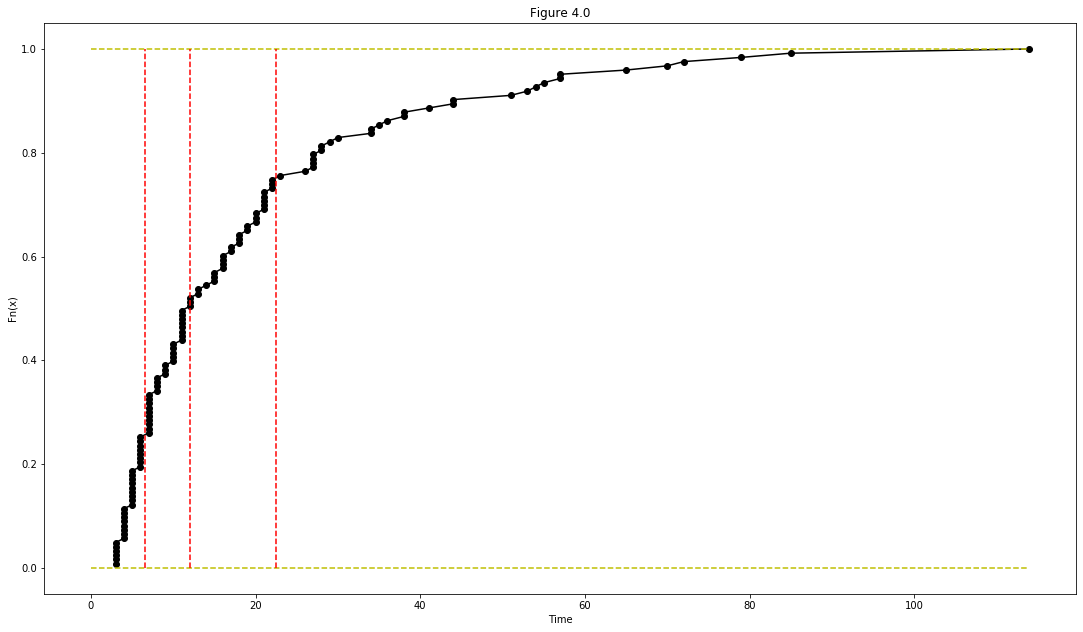

In [11]:
fig, ax = plt.subplots()

plt.plot(ecdf.x, ecdf.y, '-k')
plt.plot(ecdf.x, ecdf.y, 'ok')

### Horizontal Lines at 0 and 1
plt.plot([0, max(failures['time'])], [0,0], '--y')
plt.plot([0, max(failures['time'])], [1,1], '--y')


### Quantile Lines
plt.plot([qtl_25, qtl_25], [0, 1], '--r')
plt.plot([qtl_5, qtl_5], [0, 1], '--r')
plt.plot([qtl_75, qtl_75], [0, 1], '--r')

ax.set_xlabel('Time')
ax.set_ylabel('Fn(x)')
ax.set_title('Figure 4.0')
fig.set_size_inches(18.5, 10.5)

plt.show()

Next, the sampled frequencies as a histogram:

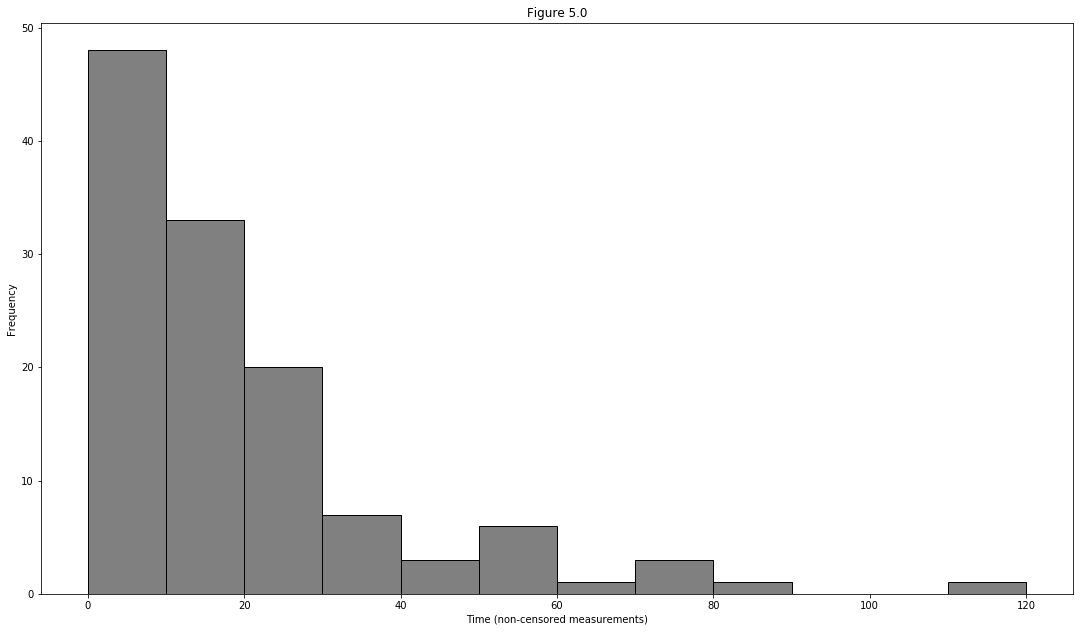

In [12]:
fig, ax = plt.subplots()

bins = np.arange(0, max(failures['time'])+10, 10)
plt.hist(failures['time'], bins=bins, range=(5, max(failures['time'])), color='grey', edgecolor='black')

ax.set_xlabel('Time (non-censored measurements)')
ax.set_ylabel('Frequency')
ax.set_title('Figure 5.0')
fig.set_size_inches(18.5, 10.5)

plt.show()

To return the plotted values, we first create a `bin` column in our data frame, and then we can look at the frequencies. 

In [13]:
bins = np.arange(0, max(failures['time'])+10, 10)

failures['binned'] = pd.cut(failures['time'], bins)
failures['binned'].value_counts(sort=False)

C:\Users\sophi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 10]       53
(10, 20]      31
(20, 30]      18
(30, 40]       6
(40, 50]       3
(50, 60]       6
(60, 70]       2
(70, 80]       2
(80, 90]       1
(90, 100]      0
(100, 110]     0
(110, 120]     1
Name: binned, dtype: int64

We can see that a majority of failures occured before time 30.

We can now construct probability plots to identify which distribution(s) may provide a good approximation of these data. I have not yet found a function that is similar to that in R, so we will instead have to create the plots individually. Note that the library is in active development and so does not yet have confidence intervals. We can still however get an initial idea of which distributions the data may follow based on how 'well' they overlay the fitted line. 

The first is the **Weibull Distribution**:

In [39]:
failures_time = failures['time'].values.tolist()
right_censored_time = right_censored['time'].values.tolist()

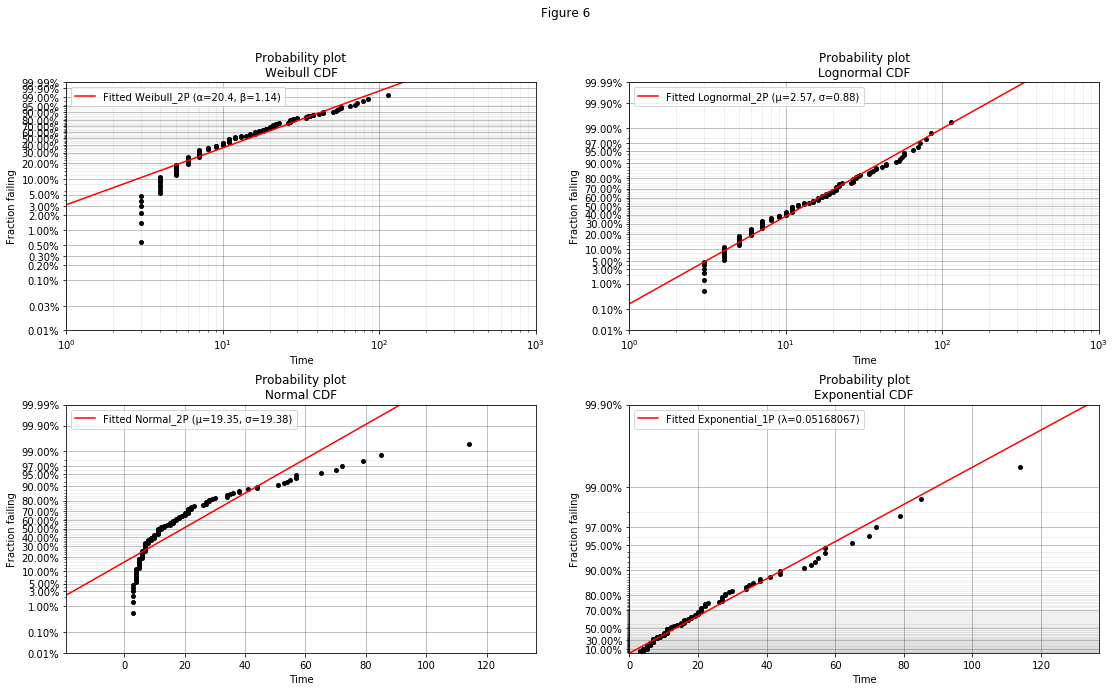

In [84]:
from reliability.Probability_plotting import Weibull_probability_plot
from reliability.Probability_plotting import Lognormal_probability_plot
from reliability.Probability_plotting import Normal_probability_plot
from reliability.Probability_plotting import Exponential_probability_plot

fig, axs = plt.subplots(2,2)

plt.subplot(221)
Weibull_probability_plot(failures=failures_time)
plt.subplot(222)
Lognormal_probability_plot(failures=failures_time)
plt.subplot(223)
Normal_probability_plot(failures=failures_time)
plt.subplot(224)
Exponential_probability_plot(failures=failures_time)

plt.suptitle("Figure 6")
plt.subplots_adjust(wspace=0.2, hspace=0.3)
fig.set_size_inches(18.5, 10.5)

plt.show()

From the <a href="https://reliability.readthedocs.io/en/latest/Probability%20plots.html#what-does-a-probability-plot-show-me">Reliability docs</a>:

These probability plots show how well the data is modelled by a particular distribution. The axes are scaled in such a way that the fitted distribution's CDF appears to be a straight line. The plots can be interpreted as:
- If the empirical CDF of the failure data (the black dots) lie on the straight line then the distribution is a good fit for the data.
- We usually tolerate a little bit of deviation at the tails

### Interpretation of the presented probability plots:
Clearly the Normal distribution would be likely to provide a poor description of the sampled times, as the black dots are non-linear and do not appear to follow the fitted line. The Weibull, Lognormal and Exponential plots are all linear and appear to follow the fitted line. Both the Lognormal and Weibull however have deviation from the line at the smaller times. As there is no ability to plot the confidence interval, we cannot comment on the level of uncertainty of these distributions from these plots.

We can have a closer look at any of these plots by plotting them separately:

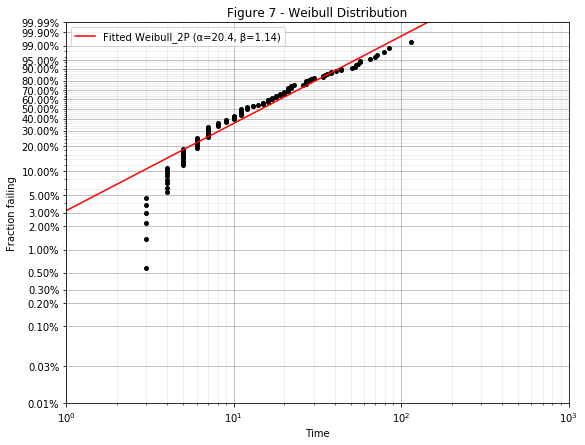

In [89]:
Weibull_probability_plot(failures=failures_time)

plt.title('Figure 7 - Weibull Distribution')
fig.set_size_inches(18.5, 10.5)

plt.show()

## 3. Fit models and estimate parameters.